In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 패키지 불러오기
from sklearn import metrics
from sklearn.linear_model import LinearRegression # sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.feature_selection import RFE # 변수 선택법 (후진 제거법)
from sklearn.preprocessing import scale # 데이터 scale

ds_hmeq = pd.read_csv("./Practice data/HMEQ.CSV")
ds_hmeq

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
5,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859
7,1,2900,7750,67996.0,HomeImp,Other,16.0,3,0.0,122.204663,2.0,8,36.211348
8,1,2900,61962,70915.0,DebtCon,Mgr,2.0,0,0.0,282.801659,3.0,37,49.206396
9,0,3000,104570,121729.0,HomeImp,Office,2.0,0,0.0,85.884372,0.0,14,32.059783


In [18]:
ds_hmeq.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [19]:
# filna: 결측치 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
ds_hmeq["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 계산 후 결측치 대체
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

In [20]:
# random seed 고정 -> 매번 실행 시 같은 값을 얻음
np.random.seed(seed = 1234)
# 0.7 (70%) 보다 작으면 True -> train 데이터, 아니면 False -> test 데이터
msk = np.random.rand(ds_hmeq.shape[0], )<0.7
ds_hmeq_train = ds_hmeq[msk]
ds_hmeq_test = ds_hmeq[~msk]
# train 데이터와 test데이터 크기
print("train data size : {}".format(ds_hmeq_train.shape))
print("test data size : {}".format(ds_hmeq_test.shape))

train data size : (2604, 13)
test data size : (1144, 13)


In [21]:
ds_hmeq_train = sm.add_constant(ds_hmeq_train)
ds_hmeq_train.head()

,const,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1.0,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,1.0,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
5,1.0,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,1.0,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859


In [22]:
log_model = sm.Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE +NINQ + CLNO + DEBTINC + 1""",ds_hmeq_train)
# -1 하면 intercept를 삭제 (y 절편)
# +1 하면 안하던지는 상관 없다.

# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2604
Model:                          Logit   Df Residuals:                     2587
Method:                           MLE   Df Model:                           16
Date:                Thu, 31 Jan 2019   Pseudo R-squ.:                  0.2096
Time:                        17:19:21   Log-Likelihood:                -636.56
converged:                       True   LL-Null:                       -805.35
                                        LLR p-value:                 4.004e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.7741      0.518     -9.209      0.000      -5.790      -3.758

In [23]:
# 로지스틱 모델로 test 데이터 예측
y_pred = log_result.predict(ds_hmeq_test)
# 0과 1의 값을 가진  class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
# 상위 5건 출력
y_pred_class.head()

3    0
4    0
7    0
8    0
9    0
dtype: int32

In [24]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}".format(metrics.accuracy_score(ds_hmeq_test["BAD"],y_pred_class)))

Accuracy: 0.924


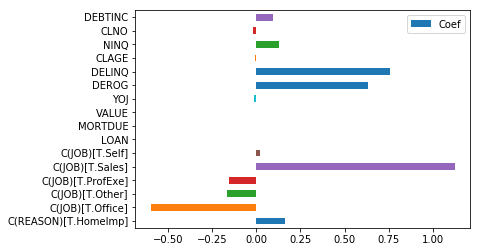

In [25]:
ds_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]},index = log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y = "Coef")

In [40]:
# select_dtypes : 특정 변수 타입을 선택/제외하여 데이터 추출
ds_hmeq_char = ds_hmeq.select_dtypes(include = "object")
ds_hmeq_numeric = ds_hmeq.select_dtypes(exclude="object")
# Data Scale
ds_hmeq_char_train = ds_hmeq_char[msk]
ds_hmeq_numeric_scaled_train = scale(ds_hmeq_numeric[msk])
ds_hmeq_numeric_scaled_train = pd.DataFrame(ds_hmeq_char_scaled_train,columns=ds_hmeq_numeric.columns)
ds_hmeq_numeric_scaled_train.head()
# BAD 변수도 함께scale처리 됨

C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.124153,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555
1,3.124153,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145
2,-0.320087,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747
3,-0.320087,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711
4,-0.320087,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514


In [43]:
# BAD 데이터를 0과 1로 변환
ds_hmeq_numeric_scaled_train["BAD"] = np.where(ds_hmeq_numeric_scaled_train["BAD"] > 0, 1, 0)
ds_hmeq_numeric_scaled_train.head()

# scale된 숫자형 데이터와 범주형 데이터 결합
ds_hmeq_scaled_train = pd.concat([ds_hmeq_numeric_scaled_train,ds_hmeq_char_scaled_train.reset_index(drop =True)],axis=1)
ds_hmeq_scaled_train.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,...,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555
1,1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,...,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145
2,0,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,...,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747
3,0,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,...,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711
4,0,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,...,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514


Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7


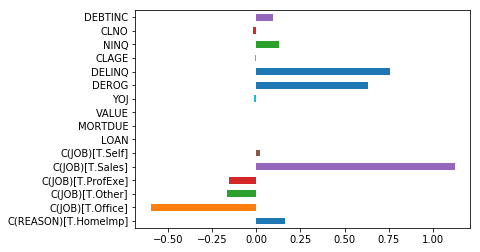

In [45]:
scaled_log_model = sm.Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE +NINQ + CLNO + DEBTINC + 1""",ds_hmeq_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 설명변수 중요도
ds_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
ds_log_scaled_coef.plot.barh(y = "Coef", legend=False)